In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 7s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
single_image = X_train[0]

In [7]:
single_image.shape

(28, 28)

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

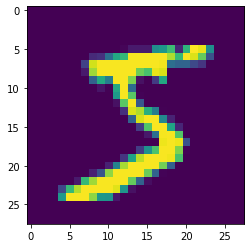

In [11]:
plt.imshow(single_image)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_exmaple = to_categorical(y_train) 

In [16]:
y_exmaple

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
y_exmaple.shape

(60000, 10)

In [18]:
y_exmaple[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_cat_test = to_categorical(y_test)

In [20]:
y_cat_test.shape

(10000, 10)

In [21]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [22]:
y_cat_test.shape

(10000, 10)

In [23]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [25]:
y_cat_train.shape

(60000, 10)

In [26]:
single_image.max()

255

In [27]:
single_image.min()

0

In [28]:
X_train = X_train/255

In [29]:
X_test = X_test/255

In [31]:
scale_image = X_train[0]

In [32]:
scale_image.max()

1.0

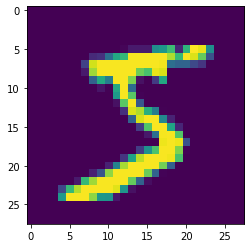

In [33]:
plt.imshow(scale_image)

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
#batch_size,width,height,color_channel
X_train = X_train.reshape( ,28,28,1)

In [36]:
X_test = X_test.reshape(10000,28,28,1)

In [37]:
from tensorflow.keras.models import Sequential

In [38]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [57]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [60]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1362 - accuracy: 0.9586 - val_loss: 0.0560 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0430 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0388 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0428 - val_accuracy: 0.9876


In [61]:
metrics = pd.DataFrame(model.history.history)

In [62]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136248,0.958650,0.055974,0.9814
1,0.047373,0.985267,0.042967,0.9857
2,0.030511,0.990333,0.038814,0.9872
3,0.019889,0.993300,0.042963,0.9865
4,0.014852,0.994950,0.042762,0.9876


<AxesSubplot:>

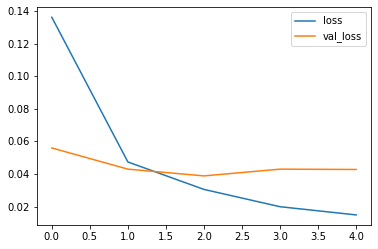

In [63]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

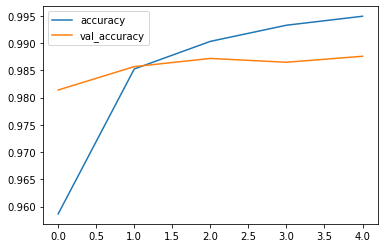

In [64]:
metrics[['accuracy','val_accuracy']].plot()

In [65]:
model.metrics_names

['loss', 'accuracy']

In [66]:
model.evaluate(X_test,y_cat_test,verbose=1)

313/313 [==============================] - 2s 4ms/step - loss: 0.0428 - accuracy: 0.9876


[0.04276197776198387, 0.9876000285148621]

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
predict = np.argmax(model.predict(X_test), axis=-1)

In [69]:
y_cat_test.shape

(10000, 10)

In [70]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [71]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [72]:
confusion_matrix(y_test,predict)

array([[ 962,    0,    5,    1,    1,    3,    8,    0,    0,    0],
       [   0, 1129,    3,    0,    0,    0,    1,    1,    1,    0],
       [   0,    0, 1025,    1,    1,    0,    0,    5,    0,    0],
       [   0,    0,    3,  998,    0,    6,    0,    1,    2,    0],
       [   0,    0,    1,    0,  973,    0,    0,    0,    0,    8],
       [   0,    0,    0,    4,    0,  885,    1,    0,    2,    0],
       [   1,    3,    2,    0,    1,    2,  948,    0,    1,    0],
       [   0,    1,    8,    0,    0,    0,    0, 1015,    2,    2],
       [   3,    1,    8,    0,    0,    1,    0,    3,  956,    2],
       [   1,    3,    1,    2,    7,    2,    0,    7,    1,  985]],
      dtype=int64)

<AxesSubplot:>

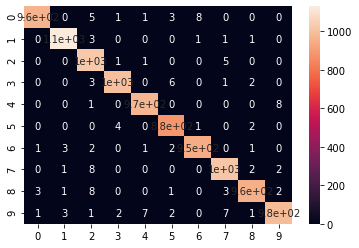

In [75]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

In [76]:
my_number = X_test[0]

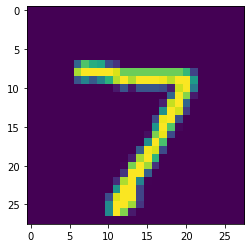

In [77]:
plt.imshow(my_number)

In [80]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

array([7], dtype=int64)